### Workshop - Data Munging with Apache Spark (Part I)

#### In order to check everything goes well during workshop, execute each cell below with Crtl + Enter or press the button "Play" (in toolbar) 

In [1]:
from pyspark.sql import SparkSession

# see more on https://spark.apache.org/docs/latest/api/python/pyspark.sql.html#pyspark.sql.SparkSession
spark = (SparkSession
         .builder
         .master("local")
         .appName("Python Spark basic example")
         .getOrCreate())

In [2]:
sc = spark.sparkContext

In [3]:
# Check that Spark is working
largeRange = sc.parallelize(range(100000), 4)
reduceTest = largeRange.reduce(lambda a, b: a + b)
filterReduceTest = largeRange.filter(lambda x: x % 7 == 0).sum()

print(reduceTest)
print(filterReduceTest)

# If the Spark jobs don't work properly these will raise an AssertionError
assert reduceTest == 4999950000
assert filterReduceTest == 714264285

4999950000
714264285


#### Loading Shakespeare text file

In [4]:
# Check loading data with sc.textFile
import os.path
baseDir = os.path.join('data')
inputPath = os.path.join('shakespeare.txt')
fileName = os.path.join(baseDir, inputPath)

rawData = sc.textFile(fileName)
shakespeareCount = rawData.count()

print(shakespeareCount)

# If the text file didn't load properly an AssertionError will be raised
assert shakespeareCount == 122395

122395


#### Display few rows from "The sonnets"

In [5]:
print ('\n'.join(rawData
                .zipWithIndex()  # to (line, lineNum)
                .map(lambda l_num: '{0}: {1}'.format(l_num[1], l_num[0])) 
                .take(15)))

0: 1609
1: 
2: THE SONNETS
3: 
4: by William Shakespeare
5: 
6: 
7: 
8:                      1
9:   From fairest creatures we desire increase,
10:   That thereby beauty's rose might never die,
11:   But as the riper should by time decease,
12:   His tender heir might bear his memory:
13:   But thou contracted to thine own bright eyes,
14:   Feed'st thy light's flame with self-substantial fuel,


#### Display some words in the cloud!

In [6]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

%matplotlib inline

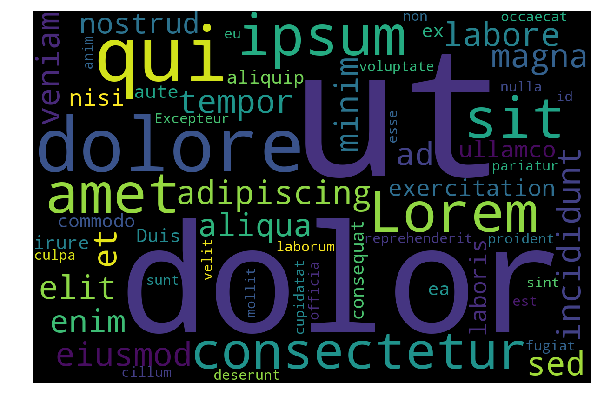

In [7]:
text = """Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna 
        aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. 
        Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint 
        occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum."""

wc = WordCloud(background_color='black', margin=2, width=1200, height=800).generate(text)
plt.figure(figsize=(10,120))
img=plt.imshow(wc)
plt.axis("off")
plt.show()

That's all folks!